<h1 align="center"> Assignment 4 </h1>

Link to runnable .ipynb file: https://github.com/Vortriz/MTH407/blob/main/labs/4/lab4.ipynb

In [41]:
using DataFrames
using StatsPlots
using LaTeXStrings

In [3]:
a = rand(1:100, 10)

10-element Vector{Int64}:
 61
 42
 86
 89
  8
 32
 32
 64
 14
 80

### 1. Implement various sorting algorithms

In [19]:
function cmp(a, b)
    global count_cmp += 1
    return a <= b
end

cmp (generic function with 1 method)

#### 1.1 BubbleSort

In [5]:
function bubblepass(a)
    c = 0
    k = length(a)

    for i in 1:k-1
        if cmp(a[i], a[i+1]) == false
            c+=1
            a[i], a[i+1] = a[i+1], a[i]
        end
    end

    return c, a
end

bubblepass (generic function with 1 method)

In [6]:
function bubblesort(a)

    c = 1
    while c > 0
        c, a = bubblepass(a)
    end

    return a
end

bubblesort (generic function with 1 method)

#### 1.2 InsertSort

In [7]:
function insert(a, b)
	k = length(a)
	push!(a, b)
	j = copy(k)

	while j >= 1 && cmp(a[j], a[j+1]) == false
		a[j], a[j+1] = a[j+1], a[j]
		j-=1
	end

	return a
end

insert (generic function with 1 method)

In [8]:
function insertsort(a)
	k = length(a)

	for i in 2:k
		a′, aᵢ, a″ = a[1:i-1], a[i], a[i+1:end]
		a′ = insert(a′, aᵢ)
		a = vcat(a′, a″)
	end

	return a
end

insertsort (generic function with 1 method)

#### 1.3 QuickSort

In [9]:
function partition(a, p)
	k = length(a)
	λ, ρ = Int[], Int[]
	c = a[p]

	for i in 1:k
		if i == p
			continue
		end

		aᵢ = a[i]
		if cmp(aᵢ, c) == true
			push!(λ, aᵢ)
		else
			push!(ρ, aᵢ)
		end
	end

	return λ, ρ
end

partition (generic function with 1 method)

In [10]:
function quicksort(a)
	k = length(a)

	 if k <= 1
		 return a
	 end

    p = rand(1:k)
	c = a[p]
	λ, ρ = partition(a, p)
	λ, ρ = quicksort(λ), quicksort(ρ)

	return vcat(λ, c, ρ)
end

quicksort (generic function with 1 method)

#### 1.4 MergeSort

In [11]:
function merge(a, b)
	i, j = 1, 1
	p, q = length(a), length(b)
	c = Int[]

	while i <= p && j <= q
		aᵢ, bᵢ = a[i], b[i]

		if cmp(aᵢ, bᵢ) == true
			push!(c, aᵢ)
			i+=1
		else
			push!(c, bᵢ)
			j+=1
		end
	end

	if j > q
		return vcat(c, a[i:end])
	else
		return vcat(c, b[j:end])
	end
end

merge (generic function with 1 method)

In [12]:
function mergesort(a)
	k = length(a)

	if k <= 1
		return a
	end

	k₂ = k÷2
	b = a[1:k₂]
	c = a[k₂+1:end]

	return merge(mergesort(b), mergesort(c))
end

mergesort (generic function with 1 method)

### 2. & 3. Comparing the algorithms by counting the number of comparisons and wall clock time.

In [13]:
function sort_helper(a, f)
    global count_cmp = 0
    time = @elapsed f(a)

    return count_cmp, time
end

sort_helper (generic function with 1 method)

In [25]:
algs = [bubblesort, insertsort, quicksort, mergesort]
arr_sizes = 2:250
df = DataFrame(arr = [rand(1000:10000, i) for i in arr_sizes])

for alg in algs
    alg_name = string(alg)
    transform!(df, :arr => ByRow(a -> sort_helper(copy(a), alg)) => [Symbol("$alg_name"*"_count"), Symbol("$alg_name"*"_time")])
end

select!(df, Not(:arr));

In [49]:
df_counts = select(df, r"count")

plt1 = @df df_counts scatter(cols(),
markersize=2, markerstrokewidth=0, legend=:topleft,
xlabel="Input size"*"\n", ylabel="\n\n"*"Number of comparisons", title="count_cmp comparision");

In [50]:
df_time = select(df, r"time")

plt2 = @df df_time scatter(cols(),
markersize=2, markerstrokewidth=0, legend=:topleft,
ylims=(:auto, maximum(df_time[end, :])*1.1),
xlabel="Input size"*"\n", ylabel="Time taken", title="Time comparision");

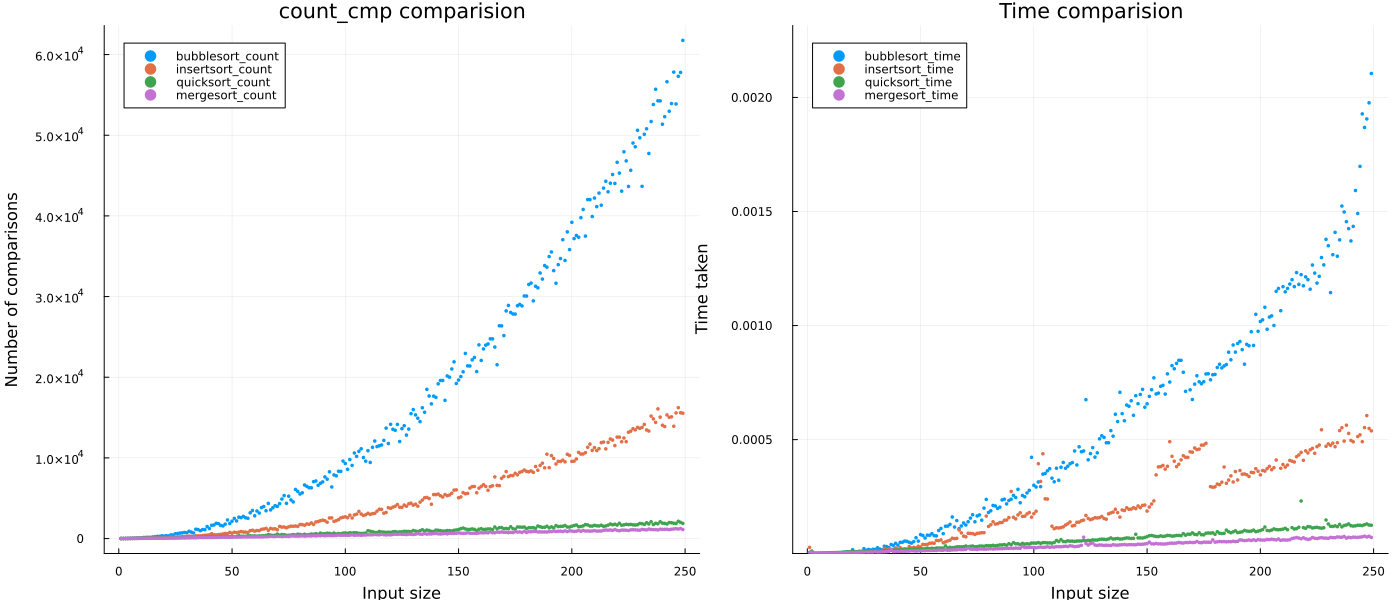

In [17]:
plot(plt1, plt2, layout=(1,2), size=(1400, 600))

#### Plotting 'Number of comparisons' and 'Time taken' in log scale to see the difference clearly.

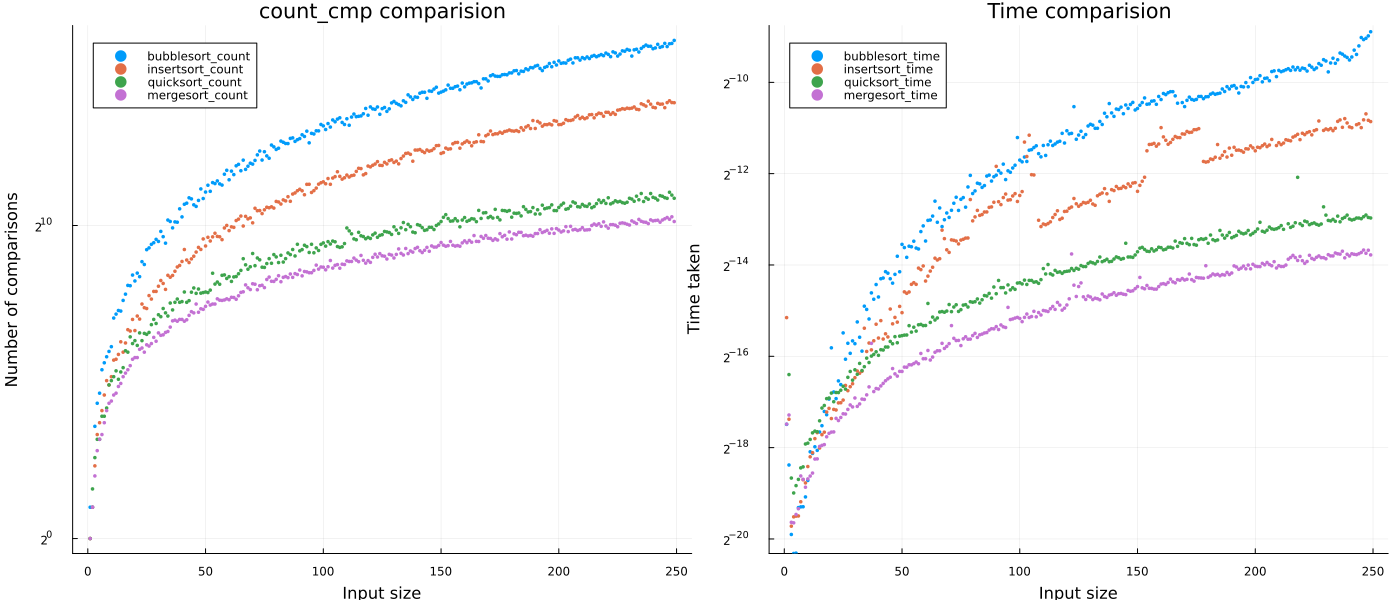

In [18]:
plot(plt1, plt2, layout=(1,2), size=(1400, 600), yscale=:log2)

> There is some abnormality in `insert_sort` time measurements which seems to be due to how Julia handles garbage collection.

#### The average complexity of each algorithm is:
- BubbleSort - $O(n^2)$
- InsertSort - $O(n^2)$
- QuickSort  - $O(n \log n)$
- MergeSort - $O(n \log n)$ 

In [28]:
nlogn(x) = x * log2(x)
n2(x) = x^2

n2 (generic function with 1 method)

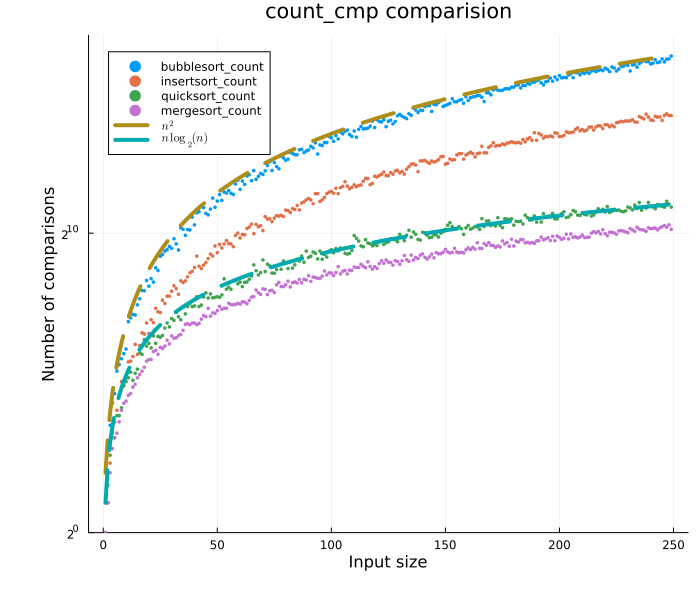

In [48]:
plot(plt1, yscale=:log2, ylims=(1, 10^5), size=(700, 600))
plot!(n2.(arr_sizes), label=L"n^2", linewidth=4, linestyle=:dash)
plot!(nlogn.(arr_sizes), label=L"n\log_2(n)", linewidth=4, linestyle=:dash)